In [4]:
# First we will import libraries
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
link = "http://bit.ly/w-data"
# we will load our data from the external url
data=pd.read_csv(link)

In [5]:
data.head()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


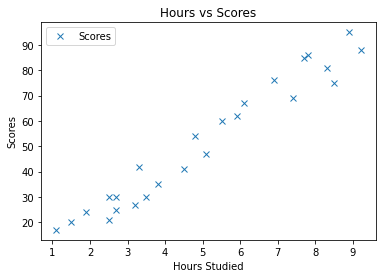

In [8]:
# now let us visualise data through plots to get an idea
data.plot(x='Hours', y='Scores', style = 'x')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

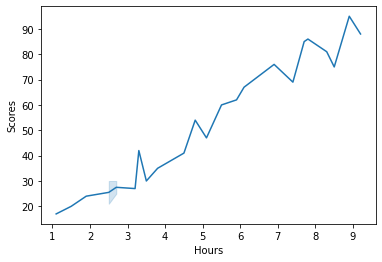

In [9]:
sns.lineplot(x="Hours",y="Scores",data=data)

In [11]:
# Now we need to prepare the data by dividing the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [13]:
# using the train_test_split() method of Scikit-Learn we will use some data to train and the other for testing purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [15]:
# for using linear regression we need to import it
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

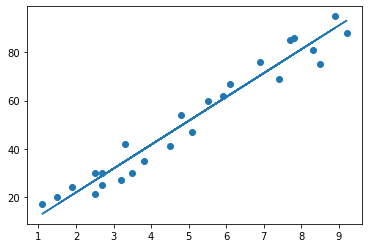

In [16]:
# now drawing graph for the test data
# Plotting for the test data
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [18]:
# Comparing Actual vs Predicted
y_pred = regressor.predict(X_test) # Predicting the scores
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
# The accuracy metric
accuracy=regressor.score(X_test,y_test)
print("The accuracy of your model is",accuracy*100)

Mean Absolute Error: 4.183859899002975
The accuracy of your model is 94.54906892105356
